<div style="align: center; margin: 0; padding: 0; height: 250px;">
    <br>
    <img src="https://i.imgur.com/NwCENi7.jpg" style="display:block; margin:auto; width:65%; height:100%;">
</div><br><br>

<div style="letter-spacing:normal; opacity:1.;">
<!--   https://xkcd.com/color/rgb/   -->
  <p style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>California Housing Prices Dataset</strong></p>  
            
  <p style="text-align:center; background-color:romance; color: Jaguar; border-radius:10px; font-family:monospace; 
            line-height:1.4; font-size:22px; font-weight:normal; text-transform: capitalize; padding: 5px;"
     >Machine Learning Engineer Module-2:<br>California Housing Prices Compute Weights<br><br></p>
    
  <div style="align: center;">
  <table style="text-align: center; background-color: romance; color: Jaguar; border-radius: 10px; font-family: monospace;
                  line-height:1.4; font-size: 21px; font-weight: normal; text-transform: capitalize; padding: 5px; 
                  margin: 0 auto;">
    <tr><td style="text-align: left; padding-left: 0px;"
            > Linear Regression with Functions <span style="font-size: 16px;">(Define Func: Preprocessor, Train Compute Weights, RMSE Loss)</span></td></tr>
    <tr><td style="text-align: left; padding-left: 0px;"
            > Linear Regression with Functions <span style="font-size: 16px;">(Define Func: Train Normal Equation with L2 (Ridge) Regularization)</span></td></tr>
  </table>
  </div>

</div>

**Dataset More Info**

> https://www.kaggle.com/datasets/camnugent/california-housing-prices

**About Dataset**

Median house prices for California districts derived from the 1990 census.

**Context**

This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

**Content**

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:

longitude

latitude

housing_median_age

total_rooms

total_bedrooms

population

households

median_income

median_house_value

ocean_proximity

**Acknowledgements**

This data was initially featured in the following paper:

Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

and I encountered it in 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.

Aurélien Géron wrote:

This dataset is a modified version of the California Housing dataset available from:

[Luís Torgo's page](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) (University of Porto)

**Inspiration**

See my kernel on machine learning basics in R using this dataset, or venture over to the following link for a python based introductory tutorial:

https://github.com/ageron/handson-ml/tree/master/datasets/housing


[Download Data](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv)

**TASK**

## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.


<!-- Solution: [homework.ipynb](homework.ipynb) -->

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`


## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.

Questions: https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>1. Import Libraries & Ingest Data</strong></h1>   
</div>

> ⚠️ Not Recommended conda `base` env, work on `venv`

- https://docs.conda.io/projects/conda/en/4.6.0/_downloads/52a95608c49671267e40c689e0bc00ca/conda-cheatsheet.pdf

```
pip freeze > requirements.txt
conda list -e > requirements.txt

# new conda virtual environment
conda create --name "lin-reg" python=3.10 jupyter -y
conda activate "lin-reg"

# install all package dependencies
pip install -r requirements.txt
conda install -c conda-forge --file=requirements.txt      # mostly not work
conda install -c conda-forge pandas==2.0.2 -q -y

# if The environment is inconsistent, try below
conda update -n base -c defaults conda --force-reinstall
conda install anaconda --force-reinstall

```

**You must use the `--no-deps` option in the pip install command in order to avoid bundling dependencies into your conda-package.**

If you run pip install without the `--no-deps` option, pip will often install dependencies in your conda recipe and those dependencies will become part of your package. This wastes space in the package and `increases the risk of file overlap`, file clobbering, and broken packages.

There might be cases where you want to install a package directly from a local directory or a specific location, without relying on the package indexes. In such situations, you can use the `--no-index` option to tell pip not to look for the package in any indexes.

```
- command1 & command2  # runs simultaneously
- command1 ; command2  # runs sequentially
- command1 && command2 # runs sequentially, runs command2 only if command1 succeeds
- command1 || command2 # runs sequentially, runs command2 only if command1 fails
```

In [1]:
!python -V

Python 3.10.12


In [2]:
%%writefile requirements.txt 
# To get started with MLflow you'll need to install the appropriate Python package.

# for parquet file
pyarrow
fastparquet
# orjson is a fast, correct JSON library
orjson
numpy
pandas
matplotlib
seaborn
scipy
tqdm
joblib

# ML Model packages
scikit-learn
xgboost
optuna
hyperopt

# MLOPS experiment-tracking Packages
mlflow
wandb

# MLOPS Orchestration Packages
boto3
prefect
prefect-aws
prefect-email

# MLOPS Monitoring Packages
evidently
psycopg
psycopg[binary]

# Optionally
requests
# for py file parameter
click
# for code style
black

# Optionally
jupyter
ipykernel
ipywidgets
pipenv

Overwriting requirements.txt


In [3]:
# !pip install pyarrow fastparquet orjson pandas matplotlib seaborn tqdm requests scikit-learn xgboost optuna hyperopt
# !pip install mlflow prefect prefect-email boto3 prefect-aws joblib evidently
# !pip install psycopg psycopg[binary] pipenv jupyter ipykernel ipywidgets

In [4]:
import os, sys, platform, IPython.display

# pip install --no-deps --no-index --force-reinstall --no-cache-dir --user
# !{sys.executable} -m pip install -Uq -r requirements.txt --no-cache-dir --user
# !jupyter nbextension enable --py widgetsnbextension

# IPython.display.clear_output()
print("Platform:", platform.system())  # platform.platform()
print("Python  :", platform.python_version())  # sys.version
print("Actv Env:", os.getenv('CONDA_DEFAULT_ENV', 'Not Found Conda Env'))

Platform: Windows
Python  : 3.10.12
Actv Env: lin-reg


In [5]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
# import scipy
# import scipy.stats as stats
# from scipy.sparse import hstack
from scipy.stats import skew, norm, gamma, probplot

from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import OneHotEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from sklearn.linear_model import LinearRegression, TweedieRegressor
# from sklearn.linear_model import ElasticNet, Lasso, LassoCV, Ridge, RidgeCV
# from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# from sklearn.model_selection import GridSearchCV

import xgboost as xgb

# Hyperparameter Optimization with Tree-structured Parzen Estimator (TPE) algorithm
import optuna
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope

import os
import sys
import pickle
import zipfile
# import boto3
# import click
# import pathlib
# import argparse
# import requests
# import urllib.request
from glob import glob
# from tqdm import tqdm           # console-based
# from tqdm.notebook import tqdm  # jupyter-based
from tqdm.auto import tqdm        # automatically selects
# tqdm._instances.clear()
# Import joblib for model persistence
# from joblib import load, dump

# memory management performs garbage collection 
import gc
gc.collect()

0

In [6]:
# Filter out FutureWarnings
import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)
# warnings.filterwarnings(action="ignore", message="FutureWarning: is_categorical_dtype*")
warnings.filterwarnings(action="ignore", module="seaborn", category=FutureWarning, message='(is_categorical_dtype is deprecated)')
warnings.filterwarnings(action="ignore", module="seaborn", category=FutureWarning, message='(use_inf_as_na option is deprecated)')
warnings.filterwarnings(action="ignore", module="sklearn", category=FutureWarning, message='(is_sparse is deprecated)')
warnings.filterwarnings(action="ignore", module="xgboost", category=FutureWarning, message='(is_sparse is deprecated)')

In [7]:
# !pip install session_info
import session_info
session_info.show(html=False)

-----
hyperopt            0.2.7
matplotlib          3.8.1
numpy               1.25.2
optuna              3.3.0
pandas              2.1.0
scipy               1.11.3
seaborn             0.13.0
session_info        1.0.0
sklearn             1.2.2
statsmodels         0.14.0
tqdm                4.66.1
xgboost             2.0.1
-----
IPython             8.12.0
jupyter_client      7.4.9
jupyter_core        5.3.0
jupyterlab          3.6.3
notebook            6.5.4
-----
Python 3.10.12 | packaged by Anaconda, Inc. | (main, Jul  5 2023, 19:09:20) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.22621-SP0
-----
Session information updated at 2023-11-02 04:24


In [8]:
import os
# Get the current working directory
# current_dir = os.getcwd()

# Create a new directory for storing data
# os.makedirs('./data', exist_ok=True)
# os.makedirs('./pycode', exist_ok=True)
# os.makedirs('./output', exist_ok=True)
# os.makedirs('./model', exist_ok=True)

<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>2. Recognizing and Understanding Data</strong></h1>   
</div>

### Getting the data 

For this homework, we'll use the California Housing Prices dataset. Download it from 
[here](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv).

You can do it with wget:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

Or just open it with your browser and click "Save as...".

Now read it with Pandas.

### Ingest Data [wget](https://linuxways.net/centos/linux-wget-command-with-examples/) or [curl](https://daniel.haxx.se/blog/2020/09/10/store-the-curl-output-over-there/)

In [9]:
# Download the data
!curl -Os --create-dirs --output-dir "./data" https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [10]:
glob('data/*.*')

['data\\housing.csv']

In [11]:
# Read the data
csv_filename = 'housing.csv'
csv_filepath = f'data/{csv_filename}'

# Read the CSV file
df = pd.read_csv(csv_filepath, low_memory=False)

In [12]:
print("Shape of DataFrame:", df.shape)
df.head()

Shape of DataFrame: (20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [14]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [15]:
df.describe(include='O').T

,count,unique,top,freq
ocean_proximity,20640,5,<1H OCEAN,9136


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


<div style="letter-spacing:normal; opacity:1.;">
  <h1 style="text-align:center; background-color: lightsalmon; color: Jaguar; border-radius:10px; font-family:monospace; border-radius:20px;
            line-height:1.4; font-size:32px; font-weight:bold; text-transform: uppercase; padding: 9px;">
            <strong>3. Exloratory Data Analysis</strong></h1>   
</div>

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

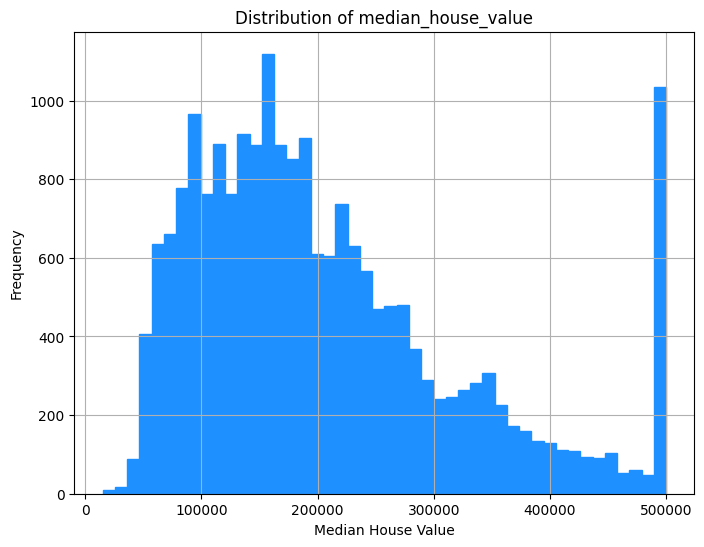

In [17]:
# Visualize the distribution of the 'median_house_value' variable using a histogram
plt.figure(figsize=(8, 6))
plt.hist(df['median_house_value'], bins='auto', color='dodgerblue', edgecolor='dodgerblue')
plt.title('Distribution of median_house_value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [18]:
origin_df = df.copy()
origin_df.shape

(20640, 10)

In [19]:
# Filter records with ocean_proximity either '<1H OCEAN' or 'INLAND'
filtered_df = df[df['ocean_proximity'].isin(['<1H OCEAN', 'INLAND'])]
filtered_df.shape

(15687, 10)

In [20]:
# Select only the specified columns
selected_columns = [
    'latitude', 
    'longitude', 
    'housing_median_age', 
    'total_rooms', 
    'total_bedrooms', 
    'population', 
    'households', 
    'median_income', 
    'median_house_value'
]
df = filtered_df[selected_columns]
df.shape

(15687, 9)

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [21]:
df.isna().sum()[df.isna().sum()>0].index.tolist()

['total_bedrooms']

The answer: **total_bedrooms**

In [22]:
# Check for missing values
df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [23]:
df.population.median(), df.population.quantile(.5)

(1195.0, 1195.0)

The answer: **1195.0**

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [24]:
from sklearn.model_selection import train_test_split

# Set the random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Convert the DataFrame to a NumPy array
# data_array = df.to_numpy()
# Shuffle the NumPy array
# np.random.shuffle(data_array)
# Create a new DataFrame with shuffled data and original column names
# shuffled_df = pd.DataFrame(data=data_array, columns=df.columns)
shuffled_df = df.sample(frac=1, random_state=SEED)

# Split the data into train/val/test sets (60%/20%/20%)
full_train_df, test_df = train_test_split(shuffled_df, test_size=(2/10), random_state=SEED)
train_df, val_df = train_test_split(full_train_df, test_size=(2/8), random_state=SEED)

train_df.shape, val_df.shape, test_df.shape

((9411, 9), (3138, 9), (3138, 9))

In [25]:
y_train = train_df.median_house_value.values
train_df = train_df.drop(columns='median_house_value')

y_val = val_df.median_house_value.values
val_df = val_df.drop(columns='median_house_value')

y_test = test_df.median_house_value.values
test_df = test_df.drop(columns='median_house_value')

y_train_log = np.log1p(y_train)
y_val_log = np.log1p(y_val)
y_test_log = np.log1p(y_test)

train_df.shape, y_train.shape, val_df.shape, y_val.shape, test_df.shape, y_test.shape, 

((9411, 8), (9411,), (3138, 8), (3138,), (3138, 8), (3138,))

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [26]:
def preprocessor_X(df: pd.DataFrame, fillna_value=-1):
    """
    Preprocesses a DataFrame for machine learning by handling missing values and converting it into a NumPy array.

    Parameters:
    - df: pd.DataFrame
        The input DataFrame containing features.
    - fillna_value: int or float, optional (default=-1)
        The value used to fill missing entries.

    Returns:
    - X: numpy.ndarray
        A 2-D NumPy array containing the preprocessed data with missing values filled.
    """
    df = df.fillna(fillna_value)
    X = df.values
    return X

In [27]:
def train_linear_regression(X, y):
    """
    Train a linear regression model.

    Parameters:
    - X: Feature matrix containing input data.
    - y: Target vector containing output data.

    Returns:
    - w0: Intercept (bias) of the linear regression model.
    - w: Coefficients (weights) for each feature.

    This function adds an intercept term to the feature matrix, computes the
    optimal model parameters using the closed-form solution, and returns the
    intercept and feature coefficients for a linear regression model.
    """
    # Add a column of ones to the beginning of the feature matrix X, 
    # typically used for the intercept term in linear regression
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate X^T @ X and its inverse
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    
    # Calculate the weight vector 'w' using the normal equation
    w = XTX_inv.dot(X.T).dot(y)  # (XTX_inv @ X.T) @ y
    
    # Return the intercept (w[0]) and the coefficients for features (w[1:])
    return w[0], w[1:]

In [28]:
def rmse(y, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE) between observed and predicted values.

    Parameters:
    - y: array-like, true target values
    - y_pred: array-like, predicted target values

    Returns:
    - rmse: float, the Root Mean Squared Error
    """
    # Calculate the error between predicted and true values
    error = y_pred - y
    
    # Calculate the Mean Squared Error (MSE)
    mse = np.mean(error ** 2)
    
    # Calculate the Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)    
    return rmse

#### Question 3: With 0

In [29]:
X_train = preprocessor_X(train_df, fillna_value=0)
X_val = preprocessor_X(val_df, fillna_value=0)

b, w = train_linear_regression(X_train, y_train_log)
y_val_pred_log = X_val.dot(w) + b  # np.dot(X_val, w) + b

rmse(y_val_log, y_val_pred_log).round(2)

0.33

#### Question 3: With mean

In [30]:
mean = train_df.total_bedrooms.mean()

X_train = preprocessor_X(train_df, fillna_value=mean)
X_val = preprocessor_X(val_df, fillna_value=mean)

b, w = train_linear_regression(X_train, y_train_log)
y_val_pred_log = X_val.dot(w) + b  # np.dot(X_val, w) + b

rmse(y_val_log, y_val_pred_log).round(2)

0.33

The answer: **Both are equally good**

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [31]:
def train_linear_regression_reg(X, y, alpha=0.0):
    """
    Train a regularized linear regression model.

    Parameters:
    - X: Feature matrix containing input data.
    - y: Target vector containing output data.
    - alpha: Regularization parameter (default is 0.0 for no regularization).

    Returns:
    - w0: Intercept (bias) of the linear regression model.
    - w: Coefficients (weights) for each feature.

    This function adds an intercept term to the feature matrix X, typically used for
    the intercept term in linear regression. It also applies L2 regularization to the
    model by adding the regularization term to the matrix XTX. (Ridge Regression)

    The regularization parameter 'r' controls the strength of regularization, where
    r=0 means no regularization. Larger 'r' values lead to stronger regularization.

    The function computes the optimal model parameters using the closed-form solution
    for regularized linear regression and returns the intercept and feature coefficients.
    """
    # Add a column of ones to the beginning of the feature matrix X, 
    # typically used for the intercept term in linear regression
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    # Calculate (X^T @ X), X transposed and multiplied by itself, 
    # which is used to calculate the model parameters without regularization.
    XTX = X.T.dot(X)

    # Apply L2 (ridge) regularization by adding a Penalty term to the linear regression model SSE.
    # Loss = SSE Σ(yi - ŷi)^2 + Penalty (α * Σ(wi^2))
    # An identity matrix with the same number of rows as XTX, scaled by the regularization parameter alpha. 
    # This means that the intermediate matrix XTX is regularized by adding a diagonal matrix with scaled Identity elements.
    # It effectively adds a penalty term to the loss function, 
    # encouraging smaller and more stable coefficients in the linear regression model.
    XTX = XTX + (alpha * np.eye(XTX.shape[0]))

    # Get its inverse (XTX + alpha * I)^(-1)
    XTX_inv = np.linalg.inv(XTX)

    # Model Parameter Calculation, (np.linalg.inv((XTX + alpha * Identity) @ X.T) @ y
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [32]:
X_train = preprocessor_X(train_df, fillna_value=0)
X_val = preprocessor_X(val_df, fillna_value=0)

for alpha in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    b, w = train_linear_regression_reg(X_train, y_train_log, alpha=alpha)
    y_val_pred_log = X_val.dot(w) + b
    rmse_val = rmse(y_val_log, y_val_pred_log)
    print('r (alpha): %06s - %0.2f' % (alpha, rmse_val))

r (alpha):      0 - 0.33
r (alpha):  1e-06 - 0.33
r (alpha): 0.0001 - 0.33
r (alpha):  0.001 - 0.33
r (alpha):   0.01 - 0.33
r (alpha):    0.1 - 0.33
r (alpha):      1 - 0.34
r (alpha):      5 - 0.34
r (alpha):     10 - 0.34


The answer: **r=0**

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same.<br>
> If it's high, the values are different. If standard deviation of scores is low, then our model is *stable*.

In [34]:
rmses = []

for SEED in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # Create a new DataFrame with shuffled data
    shuffled_df = df.sample(frac=1, random_state=SEED)

    # Split the data into train/val/test sets (60%/20%/20%)
    full_train_df, test_df = train_test_split(shuffled_df, test_size=(2/10), random_state=SEED)
    train_df, val_df = train_test_split(full_train_df, test_size=(2/8), random_state=SEED)

    y_train = train_df.median_house_value.values
    y_train_log = np.log1p(y_train)
    train_df = train_df.drop(columns='median_house_value')

    y_val = val_df.median_house_value.values
    y_val_log = np.log1p(y_val)
    val_df = val_df.drop(columns='median_house_value')

    y_test = test_df.median_house_value.values
    y_test_log = np.log1p(y_test)
    test_df = test_df.drop(columns='median_house_value')


    X_train = preprocessor_X(train_df, fillna_value=0)
    X_val = preprocessor_X(val_df, fillna_value=0)
    
    b, w = train_linear_regression(X_train, y_train_log)
    y_val_pred_log = X_val.dot(w) + b

    rmse_val = rmse(y_val_log, y_val_pred_log)
    print(SEED, rmse_val)
    
    rmses.append(rmse_val)

0 0.341921547846947
1 0.34226843377707616
2 0.3347806706663758
3 0.3360753279824166
4 0.3266039148031221
5 0.3427880123663252
6 0.345029532224206
7 0.34511409436604323
8 0.33417658467924366
9 0.33315595895448075


In [35]:
np.std(rmses).round(3)

0.006

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [36]:
# Create a new DataFrame with shuffled data
shuffled_df = df.sample(frac=1, random_state=SEED)

# Split the data into train/val/test sets (60%/20%/20%)
full_train_df, test_df = train_test_split(shuffled_df, test_size=(2/10), random_state=SEED)

y_train = full_train_df.median_house_value.values
y_train_log = np.log1p(y_train)
train_df = full_train_df.drop(columns='median_house_value')

y_test = test_df.median_house_value.values
y_test_log = np.log1p(y_test)
test_df = test_df.drop(columns='median_house_value')

In [38]:
X_train = preprocessor_X(train_df, fillna_value=0)
X_test = preprocessor_X(test_df, fillna_value=0)

In [40]:
b, w = train_linear_regression_reg(X_train, y_train_log, alpha=0.001)
y_test_pred_log = X_test.dot(w) + b

rmse_val = rmse(y_test_log, y_test_pred_log).round(2)
print(SEED, rmse_val)

9 0.34


## End of Project